In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls '/content/drive/My Drive/ventimage'

Test  Train


In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D

Using TensorFlow backend.


In [0]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
#classifier.add(Conv2D(64, (3, 3), activation='relu'))
#classifier.add(BatchNormalization())
#classifier.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
#classifier.add(Conv2D(64, (3, 3), activation='relu'))
#classifier.add(BatchNormalization())
#classifier.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
classifier.add(Flatten())
classifier.add(Dense(output_dim=128, activation='relu'))
classifier.add(Dropout(.5))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  


In [0]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
#train_datagen= ImageDataGenerator( rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_datagen= ImageDataGenerator( rescale=1./255)

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
training_set = train_datagen.flow_from_directory( '/content/drive/My Drive/ventimage/Train', target_size=(64, 64), batch_size=32, class_mode='binary')

FileNotFoundError: ignored

In [0]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/ventimage/Test', target_size=(64, 64), batch_size=32, class_mode='binary')

In [0]:
history=classifier.fit_generator(training_set, epochs=100, validation_data=test_set)

NameError: ignored

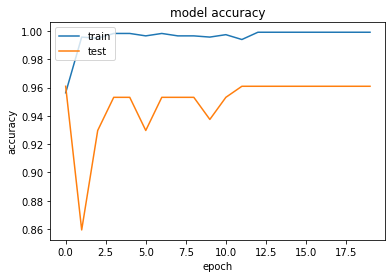

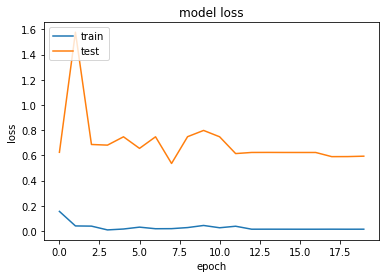

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [0]:
from sklearn.metrics import confusion_matrix